# Background of Titanic
> RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. 
--[Wikipedia](https://www.wikiwand.com/en/RMS_Titanic)



# Raise questions
- How many passengers' information is available in the dataset 
- How many features does the dataset contain
- What are the data type of these features
- Do they have missing values
- What features made one more likely to surive in the tragedy
    - Were young people more likely to survive
    - Were women more likely to survive
    - Were richer people more likely to survive
- More questions to add as the data exploration goes.

** References:**
- https://www.kaggle.com/startupsci/titanic-data-science-solutions
- https://stackoverflow.com/questions/11348183/pandas-bar-plot-with-specific-colors-and-legend-location
- https://stackoverflow.com/questions/40908983/arguements-of-bbox-to-anchor-function
- http://pandas.pydata.org/pandas-docs/stable/merging.html
- https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
- Python for Data Analysis (Book)

# Import python modules and acquire data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv('titanic-data.csv')

# A quick look of the sample dataset

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### How many passengers' information is available in the dataset?
The dataset contains information of 891 passengers.
### How many features does the dataset contains?
It has 12 features: 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'
### What are the data type of these features?
Numerical
    - Discrete: PassengerId, Sibsp, Parch
    - Continuous: Age, Fare
Categorical
    - Categorical: Survived, Sex, Embarked 
    - Ordinal: PClass 
Mixed datatype or string:
    - Name, Ticket

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Is there any missing value?
Features "Age", "Embarked", and "Cabin" have missing values. 
- Total: 891; 
- Age, 714;  (80.13 percent of the total available)
- Cabin, 204;  (22.89 percent of the total available)
- Embarked, 889;  (99.77 percent of the total available)


In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### What is the survived rate of the dataset?
38.38 percent
### What is the distribution of the dataset (numerical) ?
- **Pclass: ** More than half of the samples were of lower socio-economic status. Because the average Pclass is 2.3, and more than 75 percent of people were of Middle or Lower class. 
- **Age: **Average age of the sample was 29.70 years old, the youngest one was about five-month-old, the oldest one was 80-year-old. Half of the passengers were aged between 20-year-old to 38-year-old.
- **SinSp: ** At least 50 percent of the passengers did not travel with sibling or spouse.
- **Parch: ** Most passengers (> 75 percent) did not have parent or children onboard.
- **Fare: ** Average fare of the sample was 32.20 (not knowing the unit), with the most expansive one 512.33 and the cheappest one 0. 
- Most of the passengers (about 64.76 percent) were male.


In [8]:
titanic.describe(include=['O'])
# quick description of categorical features of the dataset

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


### What is the distribution of the dataset (categorical) ?
- **Name: ** Names are unique across the dataset.
- **Sex: ** Most of the passengers were male.
- **Ticket: ** Some people might have shared the same ticket, as only 681 out of 891 of the values are unique.
- **Cabin: ** Not unique, as expected. At most four people shared a cabin.
- **Embarked: **Most people (some 72 percent, with missing values though) of the passengers embarked from Southampton.

# Assumptions:
- Pclass, age, and sex are highly correlated to the survival rate, which I would like to focus on in the following analysis.
- SinSp, Parch, Name and Fare could also related to the surival rate. --> will combine SinSp and Parch to a new feature of Family Size and save Name and Fare for future analysis.


# Data wrangling:
### 1. Drop columns that would not be used in the analysis: 
- Drop Name as the datatype is mixed, would take longer time to explore.
- Keep  Sinsp, Parh and Fare, as they are all numerical features, which would be easy to have a quick look.
- Drop PassengersId (all unique), Ticket (too many duplicated values), Cabin (many missing values, and duplicated values)

### 2. Add a new column that convert Sex from categorical to numerical, for future analysis

### 3. Add a new feature "FamSize" that combines SibSp and Parch 

### 4. Fill in missing or null values
- **Embarked: ** There is only 0.23 percent of the values missing, so just fill in the NA with the most used port in the dataset, which is "S"

- **Age: ** About 20 percent of the values are missing. 
    - It would highly twist the result/ distribution of the dataset if just fill in with average or mode. I tried to fill in with the average age(29.70), which resulted in a surge in the number of victims of that age.
    - It would also add random noise if just fill in random numbers.
    - The dataset would lose some 20 percent of its data if we drop all of the missing values.
    - As the data analysis is not for building up a model or for some prediction, I decide it would be better to keep these data missing for now. 
        - p.s. There is also an alternative to fill in the missing values using other correlated features, but I would keep the analysis simple here.
        > We can consider three methods to complete a numerical continuous feature.
A simple way is to generate random numbers between mean and standard deviation.
More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...
Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.
Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2. --[Kaggle Turtorial]( https://www.kaggle.com/startupsci/titanic-data-science-solutions)



In [9]:
# drop columns
df = titanic.drop(['Name','PassengerId','Ticket', 'Cabin'], axis=1)

In [10]:
# convert sex from categorical to numerical
df.Sex = pd.Categorical(titanic.Sex)
df['Sex_v'] = df.Sex.cat.codes
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_v
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0


In [11]:
# add a new feature "FamSize" that combines SibSp and Parch 
df['FamSize'] = df['SibSp'] + df['Parch'] + 1

In [12]:
# fill Embarked Na with the most used port
df['Embarked'] = df['Embarked'].fillna('S')

In [13]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_v,FamSize
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,1.904602
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,11.000000


# Data exploration:

## What kind of people survived in the tragedy?

In [14]:
# a quick look at which kind of people survived in the tragedy
data_by_survive = df.groupby('Survived')
data_by_survive.mean()

,Pclass,Age,SibSp,Parch,Fare,Sex_v,FamSize
Survived,,,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887,0.852459,1.883424
1,1.950292,28.343690,0.473684,0.464912,48.395408,0.318713,1.938596


## What is the survival rate of different pclass?
> We cannot rely on proportions/percentages without the raw counts. For example, if i said that females have a 75% survival rate, do I mean 75/100 or 3/4. The larger numbers are more significant.
--from the previous review

New column for raw counts added :)

In [15]:
pclass_per = df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [16]:
pclass_count = df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).count()

In [17]:
pclass_surv = pd.merge(pclass_per, pclass_count, on='Pclass')
pclass_surv.columns = ["Pclass", "SurvivalRate", "SurvivedCount"]
pclass_surv

,Pclass,SurvivalRate,SurvivedCount
0,1,0.629630,216
1,2,0.472826,184
2,3,0.242363,491


## Wat is the survival rate between males and females?


In [18]:
sex_per = df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [19]:
sex_count = df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).count()

In [20]:
sex_surv = pd.merge(sex_per, sex_count, on='Sex')
sex_surv.columns = ["Sex", "SurvivalRate", "SurvivedCount"]
sex_surv

,Sex,SurvivalRate,SurvivedCount
0,female,0.742038,314
1,male,0.188908,577


## What is the survival rate of people embarked from different ports?

In [21]:
embark_per = df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by= 'Survived', ascending = False)

In [22]:
embark_count = df[["Embarked", "Survived"]].groupby(["Embarked"], as_index=False).count()

In [23]:
embark_surv = pd.merge(embark_per, embark_count, on='Embarked')
embark_surv.columns = ["Embarked", "SurvivalRate", "SurvivedCount"]
embark_surv

,Embarked,SurvivalRate,SurvivedCount
0,C,0.553571,168
1,Q,0.389610,77
2,S,0.339009,646


## What is the survival rate of people travelling with different number of family members?


In [24]:
famsize_per = df[['FamSize','Survived']].groupby(['FamSize'], as_index = False).mean().sort_values(by= 'Survived', ascending = False)

In [25]:
famsize_count = df[['FamSize','Survived']].groupby(['FamSize'], as_index = False).count()

In [26]:
famsize_surv = pd.merge(famsize_per, famsize_count, on='FamSize')
famsize_surv.columns = ["FamSize", "SurvivalRate", "SurvivedCount"]
famsize_surv

,FamSize,SurvivalRate,SurvivedCount
0,4,0.724138,29
1,3,0.578431,102
2,2,0.552795,161
3,7,0.333333,12
4,1,0.303538,537
5,5,0.200000,15
6,6,0.136364,22
7,8,0.000000,6
8,11,0.000000,7


In [27]:
# FamSize, SibSp, Parch will not be used in the following analysis. drop the columns.
df2 = df.drop(['FamSize', 'SibSp', 'Parch'], axis = 1)

# Some observations:

## 1. Younger people were more likely to survive.
The average of the survived ones of the dataset was 28.34, younger than the average age of the sample(29.70-year-old); and the victims' average was 30.62, older than the average age of the sample. 
## 2. People of higher socio-economic status were more likely to survive.
## 3. Female passeners had higher survival rate (74.20%)
## 4. People who embarked from Port C had highest survival rate (55.35%);
followed by those who get embarked from Port Q and S. [This probably was related to their socio-economic status]
## 5. People travelled with a few family members were more likely to survive than those travel with big families. 
Passengers who were alone had a survival rate similar to that of the overall dataset.

# Visualization

## What is the age distribution of survivers and victims?
We saw that the average age of the survived passengers is smaller than that of the victims. Let us use a histogram to see the comparison of different age band.
- Though the the survived passengers' were a little younger than the victims in average, the biggest age group in the victims were also youngsters, particularly those age between 16 to 32.
- The oldest passenger onboard (80-year-old) survived.

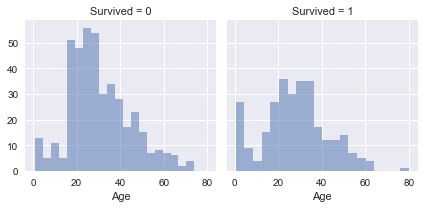

In [28]:
# df[['Sex', 'Survived']].plot(kind = 'hist', bins = 20)
age_survived = sns.FacetGrid(df2, col='Survived')
age_survived.map(plt.hist, 'Age', bins=20, alpha = .5)

## What was the survival trend by pclass?
> Suggestion. By the way, you could also use visualizations to show comparisons and trends.--from the previous review


Trend and comparison charts added :)


- Passengers of higher socio-economic had higher survival rate. The feature is highly correlated to the passengers' chance of survival.
- Only the first socio-economic status had survivers outnumbered victims.
- Victims from the third socio-economic status greately outnumbered this class's survivers. Moreover, this class accounted for the majority of the dataset. Poor people seemed to have a small chance to survive.

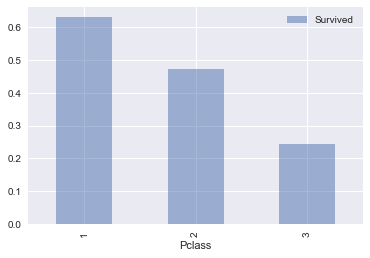

In [29]:
df2.groupby(['Pclass'])['Survived'].mean().plot(kind = 'bar', alpha = 0.5).legend(loc='best')

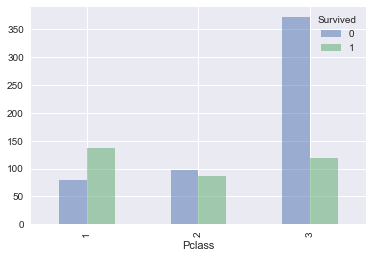

In [30]:
df2.groupby(['Pclass','Survived'])['Survived'].count().unstack().plot(kind='bar', alpha = 0.5)

## In each Pclass, what is the age distribution of survivers and victims?
- People of the first social-class are more likely to survive, despite of their age. The survived passengers had a rather normal distribution across the dataset.
- People of second socio-economic status has a similar survival rate of people of all age, and all most all of the passengers aged under 15 survived in the tragedy. 
- Most people of the third socio-ecoomic died, and most of the survived passengers were aged under 35. Very few people aged over 40 survived in the disaster.


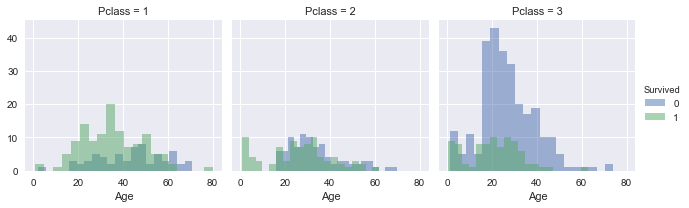

In [31]:
# to show comparison over age distribution of passengers who survived and failed to survive from different social-economic status
pclass_age_survived = sns.FacetGrid(df2, col='Pclass', hue='Survived')
pclass_age_survived.map(plt.hist, 'Age',bins=20, alpha=.5,)
pclass_age_survived.add_legend();

## For passengers embarked from different ports, who had a higher survival rate?
- Despite of socio-economic status or embarked ports, female has a much higher survival rate than male passengers;
- Richer females are more likely to be survived; female passengers of the first and second socio-economic class has a survival rate nearly 100 percent, which drop sharply for passengers of the third socio-economic status.
- Male passengers from Port Q had a very low survival rate; could explore more on if it is related to the passengers' composition.

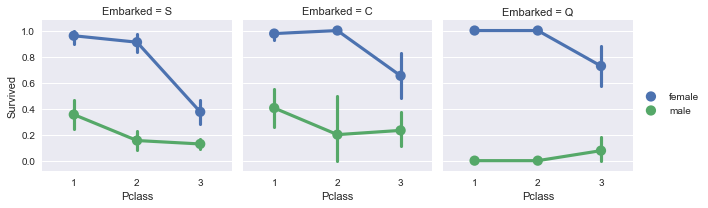

In [32]:
# to show the sruvival rate comparison between women and men, by which ports they embarked and which socio-economic class they are in
embarked_pclass_sex_survived = sns.FacetGrid(df2, col='Embarked')
embarked_pclass_sex_survived.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
embarked_pclass_sex_survived.add_legend()

## Was the extreme low surivival rate of Port Q related to the passengers' socio-economic status?
- Only 77 passengers embarked from Port Q, and the majority of them were from the third socio-economic status, which may help to explain why the passengers had a very low survival-- male passengers of the third socio-economic status, in general, had a low surival rate.


In [33]:
embar_pc = pd.crosstab(df2['Embarked'], df2['Pclass'])
embar_pc

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,129,164,353


In [34]:
embar_pc_norm = embar_pc.div(embar_pc.sum(1).astype(float), axis=0)

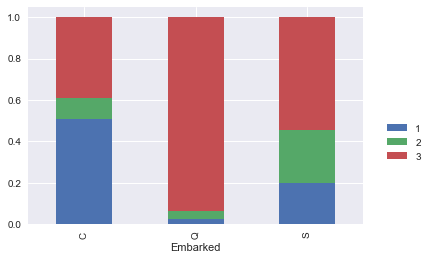

In [35]:
embar_pc_norm.plot(kind='bar', stacked=True).legend(bbox_to_anchor=(1.2, 0.5))

# In conslusion:
- We saw female passengers of higher socio-status were more likely to survive in the tragedy, though nearly 65 percent of the sample were males and more than half of the sample were of the lowest socio-economic status.
- Though the average age of the survivers was a bit younger than that of the victims, a large proportion of the victims were youngsters aged between 16 to 32. Children aged under 8 also had a higher chance to survive.
## Limitations:
- I decided not to handle missing values of age feature in this analysis, out of worries of dropping too many missing values or add random noise that would twist the actual age distribution. But there are others ways to fill in the missing values, for example, by creating a new feature in correlation with other features. I think the filling-in would be more useful in building up models than in descriptive analysis.
- This analysis had very little exploration on features of SibSp, Parch, and did not explore Fare and Name. These features could also lead to some interesting findings or create new features that will help us to better understand the dataset. For example, extract Title from the Name feature, and find the correlation between fare, pclass and survival.
